In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#user_logs - информация про юзеров (премиум)
#logs - про успехи

In [6]:
user_data = pd.read_csv('3_user_data.csv')
logs = pd.read_csv('3_logs.csv')

In [7]:
user_data.head()

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49


In [8]:
logs.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


In [11]:
#Число уникальных значений platform
logs.platform.nunique()

3

In [28]:
logs.client.nunique()

4011

In [36]:
#Клиент, совершивший большее количество удачных операций
logs.query('success == True') \
    .groupby('client', as_index=False) \
    .agg({'platform': 'count'}) \
    .rename(columns={'platform': 'num_suc'}) \
    .sort_values('num_suc', ascending=False) \
    .query('num_suc == 41')['client'].sort_values().to_list()

[12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584]

In [42]:
#С какой платформы больше всего успешных операций
logs.query('success == True') \
    .groupby('platform', as_index=False) \
    .agg({'client' : 'count'}) \
    .rename(columns={'client': 'count'}) \
    .sort_values('count', ascending=False)

,platform,count
1,phone,2019
0,computer,1090
2,tablet,180


In [41]:
#Какая платформа наиболее популярна среди премиум клиентов

In [43]:
df = logs.merge(user_data, how='inner', on='client')
df

,client,success,platform,time,premium,age
0,61468,True,phone,1585425658,False,25
1,61468,True,computer,1585460504,False,25
2,61468,True,computer,1585430291,False,25
3,61468,True,computer,1585444317,False,25
4,61468,True,phone,1585441266,False,25
...,...,...,...,...,...,...
3434,62438,False,phone,1585479041,False,36
3435,95152,True,computer,1585420263,False,67
3436,64496,False,computer,1585459072,False,66
3437,8967,True,phone,1585465121,False,33


In [44]:
#Делаем запрос на премиум клиентов
df.query('premium == True') \
    .groupby('platform', as_index=False) \
    .agg({'age': 'count'}) \
    .rename(columns={'age' : 'count'}) \
    .sort_values('count', ascending=False)

,platform,count
1,phone,246
0,computer,150
2,tablet,24


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

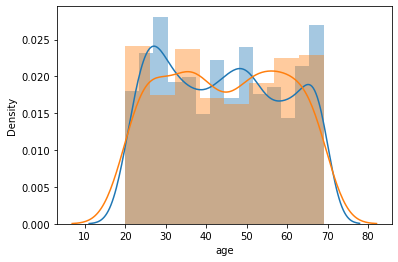

In [53]:
#Графики распределения премиум аккаунтов по возрасту
sns.distplot(df.query('premium == False').age)
sns.distplot(df.query('premium == True').age)


In [76]:
df.head()

,client,success,platform,time,premium,age
0,61468,True,phone,1585425658,False,25
1,61468,True,computer,1585460504,False,25
2,61468,True,computer,1585430291,False,25
3,61468,True,computer,1585444317,False,25
4,61468,True,phone,1585441266,False,25


In [72]:
#График зависимости число клиентов совершивших N удачных операций от числа операций
success_client = logs.query('success == True') \
                    .groupby('client', as_index=False) \
                    .agg({'platform': 'count'}) \
                    .rename(columns={'platform': 'num_suc'}) \
                    .sort_values('num_suc', ascending=False) \
                    .groupby('num_suc', as_index=False).agg({'client': 'count'}) \
                    .rename(columns={'client':'counts'})
success_client

,num_suc,counts
0,1,2791
1,2,43
2,3,1
3,40,1
4,41,9


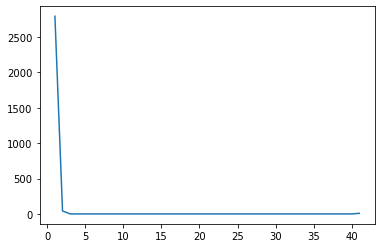

In [74]:
plt.plot(success_client.num_suc, success_client.counts) 

In [75]:
#Число успешных операций, сделанных на платформе computer в зависимости от возраста
#x - возраст, y - число успешных операций

In [79]:
df_age_computer = df.query('platform == "computer"') \
                    .groupby('age', as_index=False) \
                    .agg({'client': 'count'}) \
                    .rename(columns={'client' : 'count'})
df_age_computer.head()

,age,count
0,20,19
1,21,20
2,22,12
3,23,17
4,24,28


In [83]:
df.head()

,client,success,platform,time,premium,age
0,61468,True,phone,1585425658,False,25
1,61468,True,computer,1585460504,False,25
2,61468,True,computer,1585430291,False,25
3,61468,True,computer,1585444317,False,25
4,61468,True,phone,1585441266,False,25


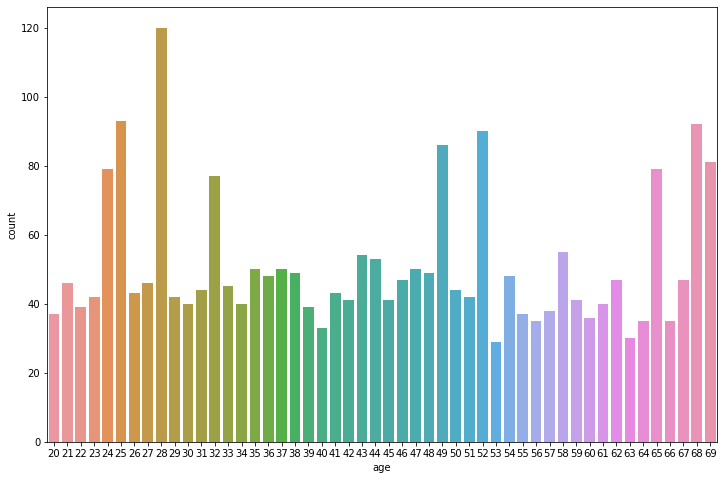

In [87]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(x="age", data=df.query('success==True'))